# How news impacts Netflix' stock price

In this notebook we
- explore how news impacts the stock price of Netflix
- fetch pricing data from the Yahoo Finance API
- fetch news articles related to Netflix from the newsfilter.io API
- visualise price and news volume over time to identify potential relationships between both

# Boilterplate

Let's fetch some news first.

In [5]:
import pandas as pd

In [23]:
# Package used to execute HTTP POST request to the API
import json
import urllib.request
%matplotlib inline

# API endpoint
API = "https://api.newsfilter.io/public/actions"
# Define the filter parameters
queryString = "(title:\"Amazon\" OR description:\"Amazon\" OR symbols:AMZN) AND publishedAt:[2019-05-04 TO 2020-03-23]"

payload = {
    "type": "filterArticles",
    "queryString": queryString,
    "size": 10000
}

# Format your payload to JSON bytes
jsondata = json.dumps(payload)
jsondataasbytes = jsondata.encode('utf-8')   # needs to be bytes

# Instantiate the request 
req = urllib.request.Request(API)

# Set the correct HTTP header: Content-Type = application/json
req.add_header('Content-Type', 'application/json; charset=utf-8')
# Set the correct length of your request
req.add_header('Content-Length', len(jsondataasbytes))
req.add_header('Authorization', '5kjjasjjdksti4i9oisdfbagdzxzvoroeaeiulszinpirhlbfoauowekg02jqjhe')

# Send the request to the API
response = urllib.request.urlopen(req, jsondataasbytes)

# Read the response 
res_body = response.read()
# Transform the response into JSON
articles = json.loads(res_body.decode("utf-8", errors='ingore'))

In [34]:
articles

{'total': {'value': 9611, 'relation': 'eq'},
 'from': 0,
 'size': 10000,
 'sort': [{'publishedAt': {'order': 'desc'}}],
 'articles': [{'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
   'categories': [],
   'symbols': ['EBAY', 'AMZN'],
   'markets': [],
   'title': 'Amazon Suspends Almost 4,000 Seller Accounts Over Price Gouging',
   'content': '',
   'description': 'Amazon.com Inc. said it has suspended thousands of seller accounts for price gouging during the coronavirus pandemic.',
   'url': 'https://newsfilter.io/articles/amazon-suspends-almost-4000-seller-accounts-over-price-gouging-916f07ad6fa4da5890379cb40bd5aeac',
   'imageUrl': 'https://assets.bwbx.io/images/users/iqjWHBFdfxIU/i692Yiw64wro/v0/-1x-1.jpg',
   'publishedAt': '2020-03-23T23:54:19.524Z',
   'id': '916f07ad6fa4da5890379cb40bd5aeac',
   'industries': ['Specialty Retail'],
   'sectors': ['Consumer Cyclical']},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'categories': [],
   'symbols': ['MDLZ', 'AMZN', 'W

In [38]:
df = pd.DataFrame.from_dict(articles['articles'])
df.head()

,source,categories,symbols,markets,title,content,description,url,imageUrl,publishedAt,...,important,country,urlToImage,time,watchCount,publishedAtNorm,watchCountNorm,ranking,tweetedAt,chartUrl
0,"{'id': 'bloomberg', 'name': 'Bloomberg'}",[],"[EBAY, AMZN]",[],"Amazon Suspends Almost 4,000 Seller Accounts O...",,Amazon.com Inc. said it has suspended thousand...,https://newsfilter.io/articles/amazon-suspends...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2020-03-23T23:54:19.524Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'id': 'reuters', 'name': 'Reuters'}",[],"[MDLZ, AMZN, WMT, SJM]",[],"Mondelez raises hourly wage, hands out weekly ...",,Mondelez International Inc &lt;MDLZ.O&gt; on M...,https://newsfilter.io/articles/mondelez-raises...,https://static.reuters.com/resources/r/?m=02&d...,2020-03-23T23:51:46Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'id': 'TheStockObserver', 'name': 'The Stock ...",[],[AMZN],[],Kovitz Investment Group Partners LLC Purchases...,,Kovitz Investment Group Partners LLC grew its ...,https://newsfilter.io/articles/kovitz-investme...,https://www.americanbankingnews.com/wp-content...,2020-03-23T23:51:32+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'id': 'cnbc', 'name': 'CNBC'}",[],[AMZN],[],Amazon gives part-time warehouse workers paid ...,,It comes as legislators and workers have calle...,https://newsfilter.io/articles/amazon-gives-pa...,https://image.cnbcfm.com/api/v1/image/10397735...,2020-03-23T23:24:41+0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'id': 'TheStockObserver', 'name': 'The Stock ...",[],[AMZN],[],Caxton Associates LP Acquires New Shares in Am...,,Caxton Associates LP acquired a new position i...,https://newsfilter.io/articles/caxton-associat...,https://www.americanbankingnews.com/wp-content...,2020-03-23T23:11:34+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Let's see how many articles we got
print(articles['total'])

# Uncomment the line below to inspect news articles
# print(json.dumps(articles, indent=2))

{'value': 9611, 'relation': 'eq'}


In [109]:
# Import yfinance to access historical price data
# pandas_datareader didn't work for me
import yfinance as yf

In [111]:
# Download Open, High, Low, Close, Adjusted Close and Volume from Yahoo Finance 
quotes = yf.download("AMZN", start="2019-05-01", end="2020-03-23")

[*********************100%***********************]  1 of 1 downloaded


In [133]:
type(quotes)

pandas.core.frame.DataFrame

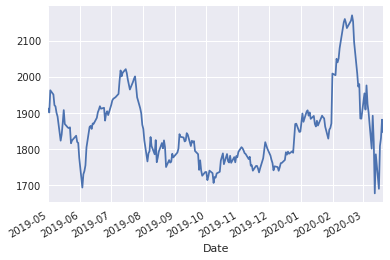

In [113]:
# Quick check to see if everything worked out
# We use Adjusted Close instead of Close to ensure that
# stock splits don't impact our results
quotes['Adj Close'].plot();

In [114]:
# Generate bins used for bar chart plotting. 
# Each bin represents one day and news volume of this day.
def get_bins (articles):
    bins = {}
    for article in articles:
        publishedAt = dateutil.parser.parse(article['publishedAt']).strftime('%Y-%m-%d')
        bins[publishedAt] = bins[publishedAt] + 1 if publishedAt in bins else 1
    return bins

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

# Seaborn plot style
plt.style.use('seaborn')

bins = get_bins(articles['articles'])

# Make sure that a bin exists for each day we have price data
for date in quotes.index:
    index = date.strftime('%Y-%m-%d')
    bins[index] = bins[index] if index in bins else 0

# Transform bins dict into dataframe      
bins = pd.DataFrame.from_dict(bins, orient='index', columns=['News Volume'])
#display(bins)
# Revert index to match quotes dataframe
#bins = bins.iloc[:,:-1]

# Merge bins and quotes into single dataframe
merged = pd.merge(left = quotes, right = bins, left_index=True, right_index=True)
merged

,Open,High,Low,Close,Adj Close,Volume,News Volume
2019-05-01,1933.09,1943.64,1910.55,1911.52,1911.52,3117000,0
2019-05-02,1913.33,1921.55,1881.87,1900.82,1900.82,3962900,0
2019-05-03,1949.00,1964.40,1936.00,1962.46,1962.46,6381600,0
2019-05-06,1917.98,1959.00,1910.50,1950.55,1950.55,5417800,35
2019-05-07,1939.99,1949.10,1903.38,1921.00,1921.00,5902100,35
2019-05-08,1918.87,1935.37,1910.00,1917.77,1917.77,4078600,31
2019-05-09,1900.00,1909.40,1876.00,1899.87,1899.87,5308300,33
2019-05-10,1898.00,1903.79,1856.00,1889.98,1889.98,5718000,36
2019-05-13,1836.56,1846.54,1818.00,1822.68,1822.68,5783400,68
2019-05-14,1839.50,1852.44,1815.75,1840.12,1840.12,4629100,48


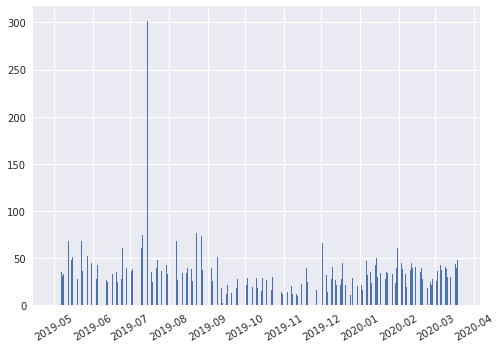

In [139]:
# Let's inspect the news volume
plt.bar(merged.index, merged['News Volume'], width=0.5)
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.show()

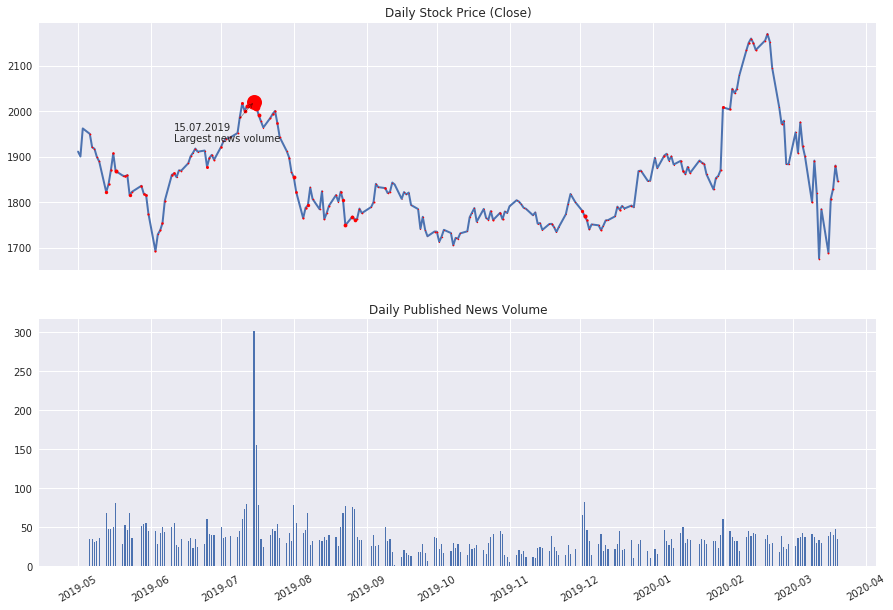

In [140]:
# Set figure size
plt.rcParams['figure.figsize'] = [15, 10]

fig, (ax1, ax2) = plt.subplots(2, sharex=True)

# Draw price time series
ax1.set_title('Daily Stock Price (Close)')
ax1.xaxis_date()
ax1.plot(merged.index, merged['Adj Close'], lw=2)
ax1.grid(True)

max_news_volume = merged['News Volume'].max()

# Draw markers onto price time series. Marker size correlates to news volume.
for index, row in merged.iterrows():
    markersize = (row['News Volume'] / max_news_volume) * 15
    ax1.plot([index], [row['Adj Close']], marker='o', color='red', markersize=markersize)
    # Overlay arrow pointer at largest news volume 
    if row['News Volume'] == max_news_volume:
        ax1.annotate(index.strftime('%d.%m.%Y') + '\nLargest news volume',
            xy=(index, row['Adj Close']), xycoords='data',
            xytext=(-80, - 40), textcoords='offset pixels',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )

# Draw news volume bar chart    
ax2.set_title('Daily Published News Volume')
ax2.bar(merged.index, merged['News Volume'], width=0.5)
ax2.grid(True)
ax2.autoscale_view()
        
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.show()

In [142]:
# Let's see what articles were published mid July 
from datetime import datetime, timezone, date

for article in articles['articles']:    
    publishedAt = dateutil.parser.parse(article['publishedAt'])
    start = datetime(2019, 7, 17, tzinfo=timezone.utc)
    end = datetime(2019, 7, 19, tzinfo=timezone.utc)
    if publishedAt > start and publishedAt < end:
        print(publishedAt)
        print(article['title'])

2019-07-18 23:55:00+00:00
Trump Says He May Intervene in Huge Pentagon Contract Sought by Amazon
2019-07-18 23:32:29+00:00
The best original series on Amazon Prime Video - Android Authority
2019-07-18 23:08:00+00:00
If President Trump intervenes in the $10 billion JEDI cloud contract, both Amazon and Microsoft could end up as losers (AMZN, MSFT, IBM, ORCL, GOOG)
2019-07-18 22:58:04+00:00
The head of Microsoft’s data cloud business is 'battle hardened' and ready to face Google and Amazon on his home turf (MSFT)
2019-07-18 21:51:33+00:00
Amazon is hiring for a 'stealth advertising' engineering team to disrupt the $100 billion gaming industry, and marketers see it as a sign of Amazon's growing ad-tech tentacles
2019-07-18 21:49:00+00:00
NSO spyware ‘targets Big Tech cloud services’ - Financial Times
2019-07-18 20:42:39+00:00
Businessweek Extra -Bloomberg's Brad Stone on Amazon (Podcast)
2019-07-18 16:41:00-04:00
Trump Vows Close Look at Computing Contract Amazon Seeks
2019-07-18 19:57:00+